# Introduction to Machine Learning

tree topics:
- training a machine learning model
- supervise learning
- unsupervise learning

## Machine learning introduciton
we collect a series of data points. and we design a model to extract knoledge.
input data x^(i), ouput data y^(i)

la funzione di regressione lineare f-teta è composta da una serie di parametri interni teta.
e prende in ingresso le varie x^(i)

d -> input vector length
s -> output vector length

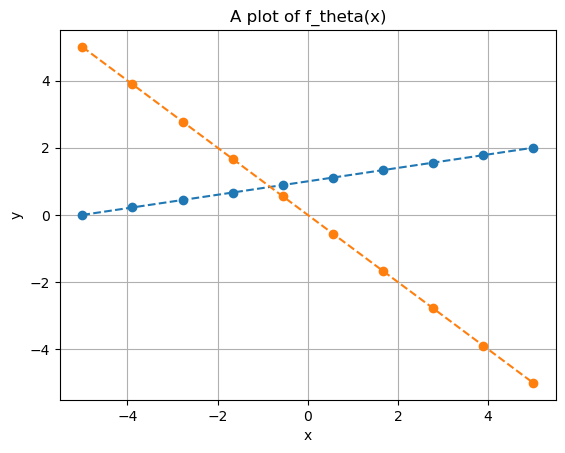

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameterized function f,           <- this is a linear model
def f(theta, x):
    return theta[0] + theta[1] * x

# Choose two different values for the parameters
theta = (1, 0.2)
theta2 = (0, -1)

# Visualize the model prediction in the range [-5, 5]
xx = np.linspace(-5, 5, 10)
yy = f(theta, xx)
yy2 = f(theta2, xx)

plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

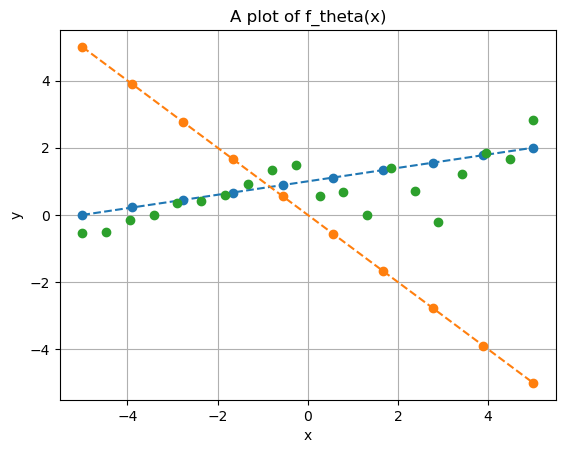

In [86]:
# Define synthetic datapoints
x_data = np.linspace(-5, 5, 20)
y_data = 1 + 0.2 * x_data + np.random.normal(0, 0.5, x_data.shape)

# Plot
plt.plot(xx, yy, 'o--')
plt.plot(xx, yy2, 'o--')
plt.plot(x_data, y_data, 'o')
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("A plot of f_theta(x)")
plt.show()

abbiamo bisogno di codificare le stringhe in valori numerici:
    
integer encoding of string -> stringe convertite in numeri incrementali  1,2,3...ecc. questa tecnica causa però un associazione di ordine tra le parole

one-hot encoding -> ogni parola è codificata con un vettori con tutti 0 apparte un 1., La lunghezza dell arrey dipende dal numero di parole nell insieme che stiamo considerando
causa comunque delle associazioni di tipo spaziale

Learn embedding -> le parole sono rappresentate con un vettore, i cui valori vengono assegnati in base alle associazioni che hanno con gli altri valori

# Gradient descend algoritm

In [87]:
import numpy as np

# simple loss function (Mock loss function for demonstration, missing X and Y)
def l(theta):
    """
    we assume theta to be a 2-dimensional vector (theta_1,theta_2)
    in the form of a numpy array with shape (2,)
    """
    return (theta[0]-1)**2 + (theta[1]-2)**2

def grad_l(theta):
    return np.array([2*(theta[0]-1), 2*(theta[1]-2)])

# l -> loss as a function
# grad_l -> gradient of the loss function
# theta -> current parameters
# eta ->  initial step size
# maxit -> max number of iteration
def GD(l, grad_l, theta_0, eta, maxit):
    # GD step
    for k in range(maxit):
        theta = theta_0 - eta * grad_l(theta_0)
        theta_0 = theta
    return theta, k


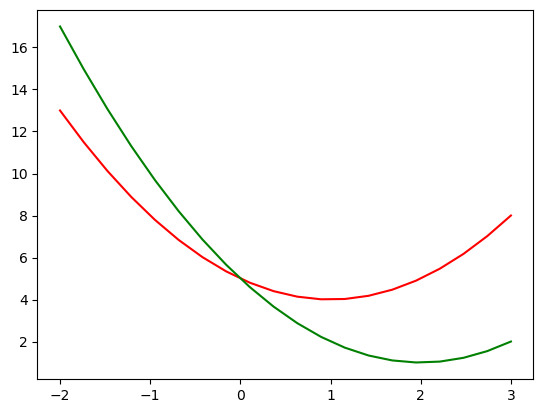

In [88]:
# visualize how the loss changes when we change each parameter separately
theta_values = np.linspace(-2, 3, 20)
loss_theta_1_change = [l(np.array([theta1, 0])) for theta1 in theta_values]
loss_theta_2_change = [l(np.array([0, theta2])) for theta2 in theta_values]
# Use a valid color string 'r' (red). '-r' is not a valid color value for the color= parameter.
plt.plot(theta_values, loss_theta_1_change, color='r')
plt.plot(theta_values, loss_theta_2_change, color='g')


In [89]:
# Test the algorithm
# Cosi troviamo i valori che danno il numero minimo con la funzione?
theta_0 = np.array([0,0]) # initial parameters set to zero
eta = 0.1
maxit = 100

theta_opt, k = GD(l, grad_l, theta_0, eta, maxit)
print(theta_opt)
print(l(theta_0))
print(l(theta_opt))

[1. 2.]
5
2.0747580268981535e-19


## Backtracking
lo scopo dell'algoritmo è quello di modulare in maniera adattiva il learning rate. E che lo fa attravero una condizione che controlla che:

Loss_function_allo_step_K+1 

sia minore di:

Loss_function_allo_step_K - (arminijo_constant) * learning_rate * norma_2_gradiente

il ciclo while serve per diminuire il learning rate affinchè non si "superi" (overshoot) il minimo

### spiegazione
noi vogliamo che la loss allo step successivo sia più piccola non più grande perchè altrimenti stiamo facendo un overshooting. Nel caso peggiore vogliamo che Loss_k+1 = Loss_k ovvero siamo in un punto di sella
per fare in modo che sia su un punto di sella la Norma_2_gradiente deve essere 0. in tutti gli altri casi in cui Loss_k+1 sia più piccola di Loss_L - arminijo_constant * lr * norma_2_gradiente vuol dire che stiamo ancora scendendo lungo il gradiente, Ovvero non stiamo risalendo lungo la loss function (overshooting). questo perchè:

In [ ]:
import numpy as np

def backtracking(L, grad_L, theta, eta0=1.0, beta=0.5, c=1e-4):
    """
    Return a step size eta that satisfies the Armijo condition:
        L(theta - eta*g) <= L(theta) - c * eta * ||g||^2
    Inputs:
      - L:      R^n -> R
      - grad_L: R^n -> R^d
      - theta:  current point (np.ndarray)
      - eta0:   initial step size
      - beta:   shrinking factor in (0,1)
      - c:      Armijo constant in (0,1)
    """
    eta = eta0
    g = grad_L(theta)
    g_norm2 = np.dot(g, g)

    # se:   Loss_k+1 > Loss_k - Armijo_constante * eta * norma_2_gradiente
    # allora riduci eta
    while L(theta - eta * g) > L(theta) - c * eta * g_norm2:
        eta *= beta
    return eta

: 

In [91]:
def GD_backtracking1(l, grad_l, theta_0, maxit): 
    # GD step
    for k in range(maxit):
        eta = backtracking(l, grad_l, theta_0)
        theta = theta_0 - eta * grad_l(theta_0)
        theta_0 = theta
    return theta, k

In [92]:
# Test the algorithm
# Cosi troviamo i parametri che minimizzano la funzione (loss function)
theta_0 = np.array([0,0])
maxit = 100

theta_opt, k = GD_backtracking1(l, grad_l, theta_0, maxit)
print(theta_opt)
print(l(theta_0))
print(l(theta_opt))

[1. 2.]
5
0.0


# Altre condizioni

ha senso aggiungere altre condizioni come tolL e tolTheta,
la prima controlla che il gradiente non sia troppo piccolo,
la seconda controlla che non sia troppo piccola la differenza tra theta e theta_0

In [93]:
# Nuova verdione con criteri di arresto
def GD_backtracking(l, grad_l, theta_0, maxit, tolL, tolTheta):
    # GD step
    for k in range(maxit):
        eta = backtracking(l, grad_l, theta_0)
        theta = theta_0 - eta * grad_l(theta_0)

        # viene fatta la norma per poter avere una misura scalare del vettore (o se theta fosse una matrice della matrice)
        # linalg.norm di base fa la norma 2 per i vettori e la norma di Frobenius per le matrici
        # controlliamo che la lunghezza del gradiente non sia troppo corta 
        # e che la differenza tra i parametri attuali e quelli precedenti non sia troppo piccola
        if(np.linalg.norm(grad_l(theta))<tolL or (np.linalg.norm(theta-theta_0)<tolTheta)):
            break

        theta_0 = theta
    return theta, k

In [94]:
# Test the algorithm
# Cosi troviamo i valori che danno il numero minimo con la funzione?
theta_0 = np.array([0,0])
maxit = 100
tolL = 1e-6
tolTheta = 1e-6

theta_opt, k = GD_backtracking(l, grad_l, theta_0, maxit, tolL, tolTheta)
print(theta_opt)
print(l(theta_0))
print(l(theta_opt))

[1. 2.]
5
0.0


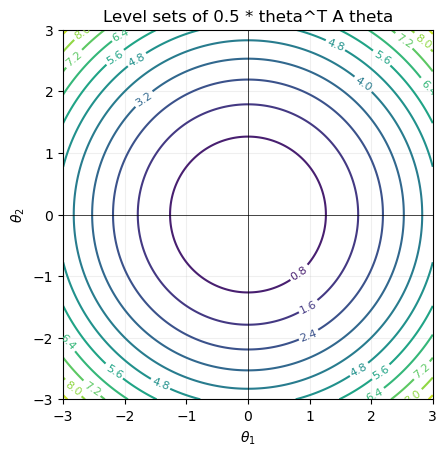

In [95]:
import numpy as np
import matplotlib.pyplot as plt


# stampiamo le curve di livallo di una funzione quadratica (una specie di ellissi)   
# 
# Y = 1/2 * lambda_1*theta_1^2 + lambda_2*theta_2^2         
# 
# NOTE: lambda_1 e lambda_2 sono due valori fissi che derminano la forma dell'ellisse - theta_1 e theta_2 sono le variabili
# 
# il gradiente si muove sempre perpendicolarmente alle curve di livello
# in un cerciò percio il gradiente ha la stezza direzione del raggio (punta al centro dell'ellisse)
# in ellissi però il gradiente ortogonale alla curva di livello non punta essattamente al centro.
# ciò può causare problemi di convergenza siccome inizia a rimbalzare tra i lati dell'ellissi convergendo lentamente

def quad_levelsets(A, xlim=(-3,3), ylim=(-3,3), ngrid=400, 
                   ncontours=12, title=None):
    xs = np.linspace(xlim[0], xlim[1], ngrid)
    ys = np.linspace(ylim[0], ylim[1], ngrid)
    X, Y = np.meshgrid(xs, ys)
    Z = 0.5*(A[0,0]*X**2 + 2*A[0,1]*X*Y + A[1,1]*Y**2)  # theta^T A theta, left-multiplied convention
    cs = plt.contour(X, Y, Z, levels=ncontours)
    plt.clabel(cs, inline=True, fontsize=8)
    plt.axhline(0, lw=0.5, color='k')
    plt.axvline(0, lw=0.5, color='k')
    plt.gca().set_aspect('equal', 'box')
    if title:
        plt.title(title)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.grid(alpha=0.2)
    plt.show()

# Example: ill-conditioned ellipse
A = np.diag([1.0, 1.0])  # lambda1 << lambda2
quad_levelsets(A, title='Level sets of 0.5 * theta^T A theta')

In [96]:
# Try to implement the GD algorithm on the functions:
# l1(theta) = theta_1^2 + theta_2^2       # cerchio -> lambda1 = lambda2
# l2(theta) = 10theta_1^2 + theta_2^2     # ellissi -> lambda 1 = 10
# and compare against GD with backtracking
# set theta0 = [1, 1] for both

def l1(theta):
    """
    We assume theta to be a 2-dimensional vector (theta_1, theta_2)
    in the form of a numpy array with shape (2,)
    """
    return (theta[0])**2 + (theta[1])**2

def grad_l1(theta):
    """
    NOTE: It is expected to return a numpy array with shape (2,)
    """
    return np.array([2 * (theta[0]), 2 * (theta[1])])

theta_0 = np.array([1, 1])
theta_sol1, it1 = GD_backtracking(l1, grad_l1, theta_0, 
                maxit=100, tolL=1e-10, tolTheta=1e-10)
print(f"Solution: {theta_sol1}, it. {it1}")


def l2(theta):
    """
    We assume theta to be a 2-dimensional vector (theta_1, theta_2)
    in the form of a numpy array with shape (2,)
    """
    return 10*(theta[0])**2 + (theta[1])**2

def grad_l2(theta):
    """
    NOTE: It is expected to return a numpy array with shape (2,)
    """
    return np.array([20 * (theta[0]), 2 * (theta[1])])

theta_0 = np.array([1, 1])
theta_sol2, it2 = GD_backtracking(l2, grad_l2, theta_0, 
                maxit=500, tolL=1e-10, tolTheta=1e-10)
print(f"Solution: {theta_sol2}, it. {it2}")

Solution: [0. 0.], it. 0
Solution: [-1.43860605e-11  1.84322286e-10], it. 86
